In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

#Gradient Descent

In [21]:
X = [0.5, 2.5]
Y = [0.2, 0.9]

def f(w, b, x):
  return 1.0 / (1.0 + np.exp(-(w*x+b)))

def error(w, b):
  err = 0.0
  for x, y in zip(X, Y):
    fx = f(w, x, b)
    err += 0.5 * (fx - y) ** 2
  return err

def grad_b(w, b, x, y):
  fx = f(w, b, x)
  return (fx - y) * fx * (1 - fx)

def grad_w(w, b, x, y):
  fx  = f(w, b, x)
  return (fx - y) * fx * (1 - fx) * x

def do_gradient_descent(eta=10.01, max_epochs=1000):
  all_w, all_b, all_error = [], [], []

  w, b = -2, -2
  for i in range(max_epochs):
    dw, db = 0, 0
    for x, y in zip(X, Y):
      dw += grad_w(w, b, x, y)
      db += grad_b(w, b, x, y)

    w = w - eta * dw
    b = b - eta * db

    #Save
    all_w.append(w)
    all_b.append(b)
    all_error.append(error(w, b))

  #Prediction
  print("Parameters: ", w, b)
  for x, y in zip(X, Y):
    print("Input: ", x, "True y: ", y, "Predicted y: ", f(w, b, x))

  return all_w, all_b, all_error

#Error Surface

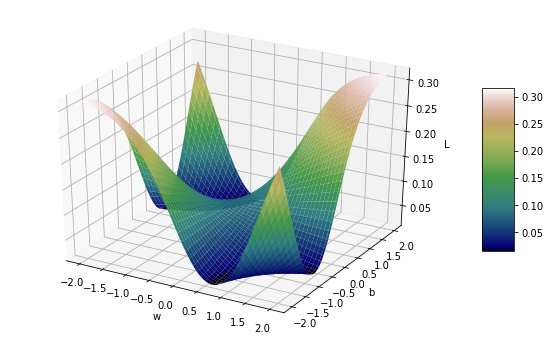

In [22]:
w = np.linspace(-2, 2, 100)
b = np.linspace(-2, 2, 100)

W, B = np.meshgrid(w, b)
L = error(W, B)

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
surf1 = ax.plot_surface(W, B, L, cmap='gist_earth') #binary, bwr
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('L')
fig.colorbar(surf1, ax=ax, shrink=0.5, aspect=5)
plt.show()

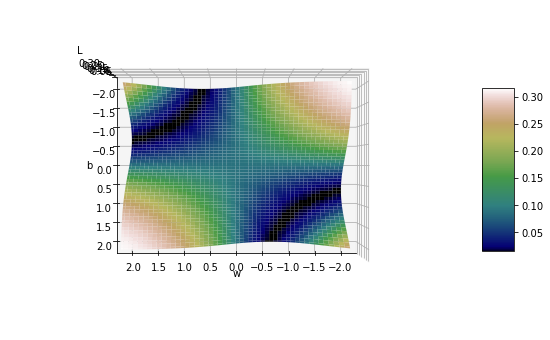

In [23]:
#Top view
ax.view_init(90, 90)
fig

In [24]:
%time
all_w, all_b, all_error = do_gradient_descent(eta=0.01, max_epochs=10000)

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 9.06 µs
Parameters:  1.0283381037370765 -1.0940196756176752
Input:  0.5 True y:  0.2 Predicted y:  0.3589669658627764
Input:  2.5 True y:  0.9 Predicted y:  0.8140926250116315


In [25]:
def plot_error_surface(all_w, all_b, all_error, view_x=30, view_y=40):
  w = np.linspace(-2, 2.1, 100)
  b = np.linspace(-2, 2.1, 100)

  W, B = np.meshgrid(w, b)
  L = error(W, B)

  fig = plt.figure(figsize=(10,6))
  ax = fig.add_subplot(111, projection='3d')
  ax.view_init(view_x, view_y)
  ax.plot3D(all_w, all_b, all_error, color='red')
  surf1 = ax.plot_surface(W, B, L, cmap='gist_earth', alpha=.7) #binary, bwr
  ax.set_xlabel('w')
  ax.set_ylabel('b')
  ax.set_zlabel('L')
  fig.colorbar(surf1, ax=ax, shrink=0.5, aspect=5)
  plt.show()
  

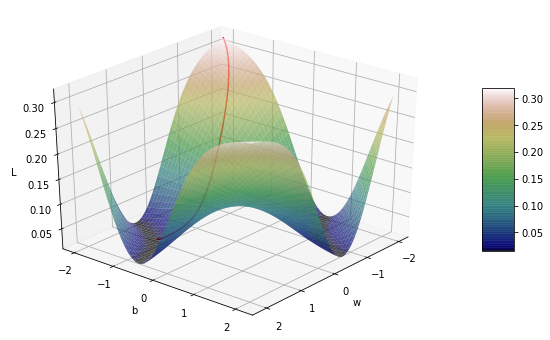

In [26]:
ax = plot_error_surface(all_w, all_b, all_error)

#Momentum Based Gradient Descent

In [27]:
def do_momentum_gradient_descent(eta=0.01, max_epochs=1000):
  all_w, all_b, all_error = [], [], []

  w, b = -2, -2
  prev_v_w, prev_v_b, gamma  = 0, 0, 0.9
  for i in range(max_epochs):
    dw, db = 0, 0
    for x, y in zip(X, Y):
      dw += grad_w(w, b, x, y)
      db += grad_b(w, b, x, y)

    v_w = gamma * prev_v_w + eta * dw
    v_b = gamma * prev_v_b + eta * db
    w = w - v_w
    b = b - v_b

    all_w.append(w)
    all_b.append(b)
    all_error.append(error(w, b))

  #Prediction
  print("Parameters: ", w, b)
  for x, y in zip(X, Y):
    print("Input: ", x, "True y: ", y, "Predicted y: ", f(w, b, x))

  return all_w, all_b, all_error 

In [28]:
%time
all_w, all_b, all_error = do_momentum_gradient_descent()

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.58 µs
Parameters:  -1.941509133519827 -1.9196637041405102
Input:  0.5 True y:  0.2 Predicted y:  0.05262925978765836
Input:  2.5 True y:  0.9 Predicted y:  0.0011424506376675337


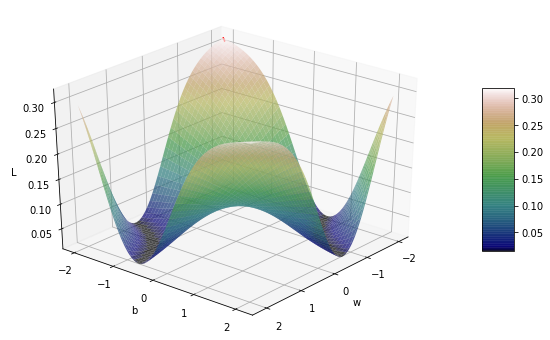

In [29]:
ax = plot_error_surface(all_w, all_b, all_error)

In [32]:
def do_nestrov_accelerated_gradient_descent(eta=0.01, max_epochs=1000):
  all_w, all_b, all_error = [], [], []

  w, b = -2, -2
  prev_v_w, prev_v_b, gamma  = 0, 0, 0.9
  for i in range(max_epochs):
    dw, db = 0, 0
    #do partial update
    v_w = gamma * prev_v_w
    v_b = gamma * prev_v_b
    for x, y in zip(X, Y):
      dw += grad_w(w + v_w, b + v_b, x, y)
      db += grad_b(w + v_w, b + v_b, x, y)

    #Now do full update
    v_w = gamma * prev_v_w + eta * dw
    v_b = gamma * prev_v_b + eta * db
    w = w - v_w
    b = b - v_b

    all_w.append(w)
    all_b.append(b)
    all_error.append(error(w, b))

  #Prediction
  print("Parameters: ", w, b)
  for x, y in zip(X, Y):
    print("Input: ", x, "True y: ", y, "Predicted y: ", f(w, b, x))

  
  return all_w, all_b, all_error

In [33]:
%time
all_w, all_b, all_error = do_nestrov_accelerated_gradient_descent()

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 7.63 µs
Parameters:  -1.941509133519827 -1.9196637041405102
Input:  0.5 True y:  0.2 Predicted y:  0.05262925978765836
Input:  2.5 True y:  0.9 Predicted y:  0.0011424506376675337


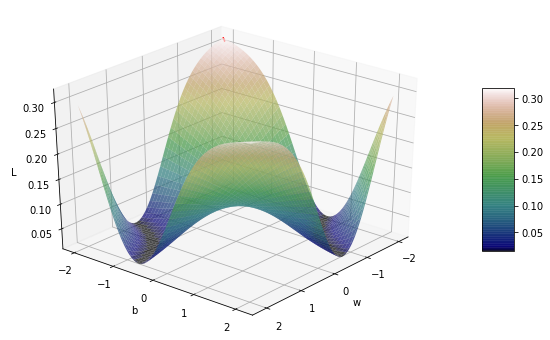

In [34]:
ax = plot_error_surface(all_w, all_b, all_error)

In [40]:
def do_stochastic_gradient_descent(eta=0.1, max_epochs=1000):
  all_w, all_b, all_error = [], [], []

  w, b = -2, -2
  for i in range(max_epochs):
    dw, db = 0, 0
    for x, y in zip(X, Y):
      dw += grad_w(w, b, x, y)
      db += grad_b(w, b, x, y)

      w = w - eta * dw
      b = b - eta * db

    all_w.append(w)
    all_b.append(b)
    all_error.append(error(w, b))

  #Prediction
  print("Parameters: ", w, b)
  for x, y in zip(X, Y):
    print("Input: ", x, "True y: ", y, "Predicted y: ", f(w, b, x))

  
  return all_w, all_b, all_error

In [41]:
%time
all_w, all_b, all_error = do_stochastic_gradient_descent()

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 6.91 µs
Parameters:  1.3962844461025044 -1.7941221586096618
Input:  0.5 True y:  0.2 Predicted y:  0.25049389094671864
Input:  2.5 True y:  0.9 Predicted y:  0.8450887077810995


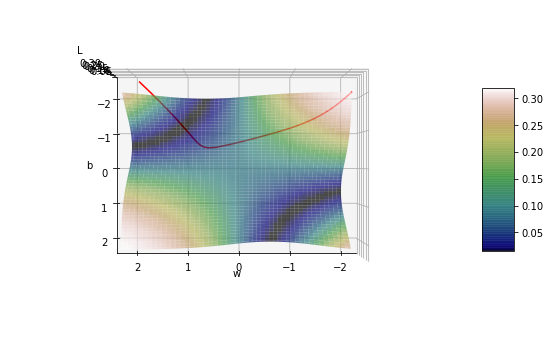

In [47]:
ax = plot_error_surface(all_w, all_b, all_error, view_x=90, view_y=90)

In [44]:
def do_minibatch_gradient_descent(eta=1.0, max_epochs=1000):
  all_w, all_b, all_error = [], [], []
  
  w, b = -2, -2
  mini_batch_size = 2
  for i in range(max_epochs):
    dw, db = 0, 0
    num_points_seen = 0
    for x, y in zip(X, Y):
      dw += grad_w(w, b, x, y)
      db += grad_b(w, b, x, y)
      num_points_seen += 1

      if num_points_seen % mini_batch_size == 0:  
        w = w - eta * dw
        b = b - eta * db
        dw = 0
        db = 0
    
    all_w.append(w)
    all_b.append(b)
    all_error.append(error(w, b))

  #Prediction
  print("Parameters: ", w, b)
  for x, y in zip(X, Y):
    print("Input: ", x, "True y: ", y, "Predicted y: ", f(w, b, x))

  
  return all_w, all_b, all_error

In [45]:
%time
all_w, all_b, all_error = do_minibatch_gradient_descent()

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 7.15 µs
Parameters:  1.7917198301022377 -2.2821180729166732
Input:  0.5 True y:  0.2 Predicted y:  0.20000579258360626
Input:  2.5 True y:  0.9 Predicted y:  0.8999961231834462


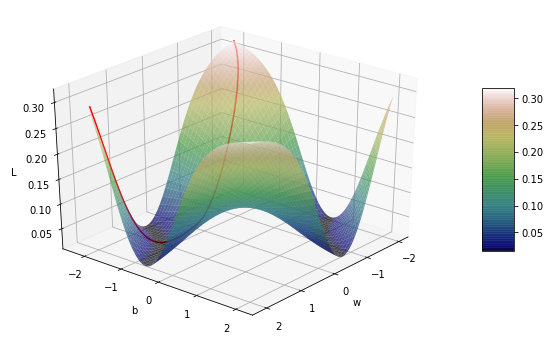

In [46]:
ax = plot_error_surface(all_w, all_b, all_error)